In [2]:
import matplotlib.pyplot as plt
from datetime import datetime


Название предмета: Телевизор
Стоимость проката в сутки: 300.00 руб.
Общая стоимость аренды за 1 суток: 300.00 руб.


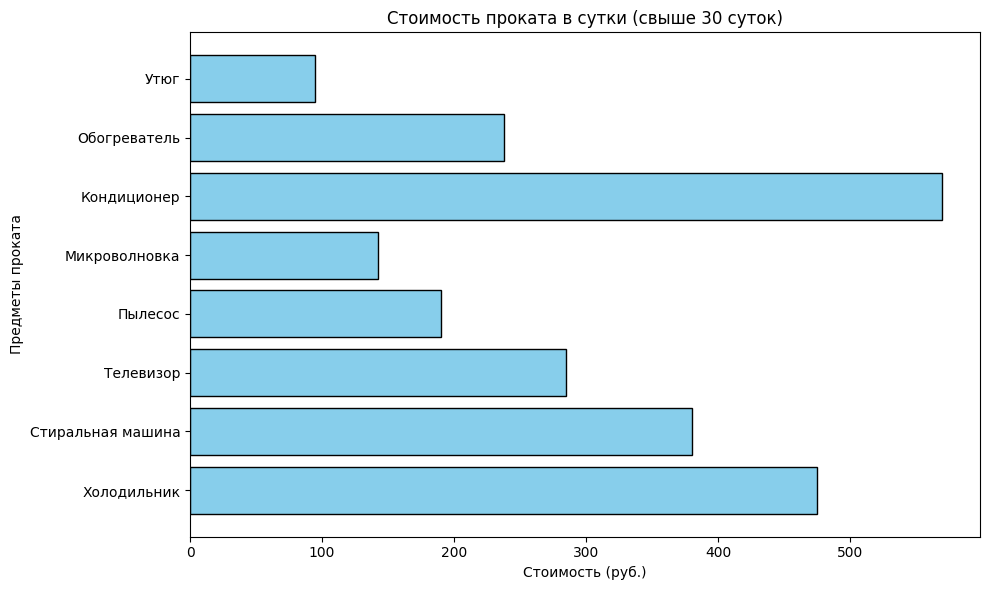

In [3]:
rental_items = [
    {"code": 1, "name": "Холодильник", "daily_cost": 500},
    {"code": 2, "name": "Стиральная машина", "daily_cost": 400},
    {"code": 3, "name": "Телевизор", "daily_cost": 300},
    {"code": 4, "name": "Пылесос", "daily_cost": 200},
    {"code": 5, "name": "Микроволновка", "daily_cost": 150},
    {"code": 6, "name": "Кондиционер", "daily_cost": 600},
    {"code": 7, "name": "Обогреватель", "daily_cost": 250},
    {"code": 8, "name": "Утюг", "daily_cost": 100},
]

# Функция для вычисления стоимости аренды
def calculate_rental_cost(code, days_rented):
    
    item = next((item for item in rental_items if item["code"] == code), None)
    if not item:
        return None, None, None  
    
    daily_cost = item["daily_cost"]
    
    if days_rented > 30:
        daily_cost *= 0.95 
    
    total_cost = daily_cost * days_rented
    return item["name"], daily_cost, total_cost

# Ввод данных пользователя
try:
    item_code = int(input("Введите код предмета проката (1-8): "))
    start_date_str = input("Введите дату начала аренды (в формате ГГГГ-ММ-ДД): ")
    end_date_str = input("Введите дату окончания аренды (в формате ГГГГ-ММ-ДД): ")
    
   
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    days_rented = (end_date - start_date).days
    
   
    name, daily_cost, total_cost = calculate_rental_cost(item_code, days_rented)
    
    if name:
        print(f"\nНазвание предмета: {name}")
        print(f"Стоимость проката в сутки: {daily_cost:.2f} руб.")
        print(f"Общая стоимость аренды за {days_rented} суток: {total_cost:.2f} руб.")
    else:
        print("Предмет с указанным кодом не найден.")
except ValueError:
    print("Некорректный ввод!")

discounted_costs = [
    {"name": item["name"], "discounted_cost": item["daily_cost"] * 0.95}
    for item in rental_items
]

names = [item["name"] for item in discounted_costs]
costs = [item["discounted_cost"] for item in discounted_costs]
plt.figure(figsize=(10, 6))
plt.barh(names, costs, color="skyblue", edgecolor="black")
plt.title("Стоимость проката в сутки (свыше 30 суток)")
plt.xlabel("Стоимость (руб.)")
plt.ylabel("Предметы проката")
plt.tight_layout()
plt.savefig("rental_cost_chart.png")
plt.show()
